Question 1a.)

Regularization and cross-validation both minimize overfitting of models. Regularization attempts to generalize the data so that the machine does not recognize very specific patterns while cross-validation so that the data is tested in segments and can apply to all groupings of data. Feature scaling normalizes data so that the data is in a smaller range. This allows the machine to interpret features on the same scale.
For the prediction mechanisms of several supervised learning algorithms are best executed after several of these principles are applied. Once the data is all in a similar range (feature scaling) and it is sufficiently mixed (cross-validation), we can carry out several models that will better categorize variables. For support vector mechanisms, creating a margin between variables occurs best when the data is able to generalize to all data. Thus, sufficient margins are created, satisfying the underlying assumption that margins should be as large as possible. The overall objective is to categorize new data points into their correct categories, and this is best done when the testing data is just as accurate as the training data, and both training/testing are accurate.


Question 1b.)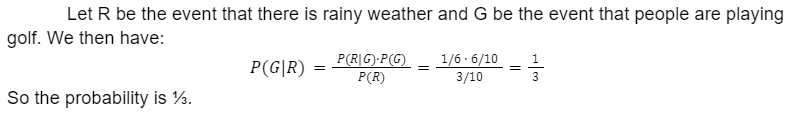

Question 2a.)

In [1]:
import numpy as np

In [9]:
def simple_neural_network(input, weights):
    hidden_layer = input.dot(weights[0])
    # Apply ReLu
    for i in hidden_layer:
      if i < 0:
        hidden_layer[i]=0
    output_layer = hidden_layer.dot(weights[1])
    for j in output_layer:
      return 1 / (1 + np.exp(-j))

In [11]:
# 2 neurons -> 3 neurons -> 1 neuron
input_vector=np.array([0.5, 0.7])
w1 = np.array([[0.1,0.2,0.3],[0.4,0.5,0.6]])
w2 = np.array([[0.7],[0.8],[0.9]])
weights = [w1, w2]

print("Output: " + str(simple_neural_network(input_vector, weights)))

Output: 0.7510088346069963


Question 2b.)

In [4]:
def calc_size(input_size, filter_size, stride):
    return (input_size - filter_size) // stride + 1

In [7]:
height, width = 6, 6
channel = 3

cnn_h, cnn_w, cnn_ch = 3, 3, 3

stride = 2
padding = 0

print("Output height: ", calc_size(height, cnn_h, stride))
print("Output width: ", calc_size(width, cnn_w, stride))

print("Number of parameters: ", cnn_h*cnn_w*cnn_ch+1)

Output height:  2
Output width:  2
Number of parameters:  28


Question 3.)

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [18]:
max_features = 10000
max_seq = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [19]:
x_train = pad_sequences(x_train, maxlen=max_seq)
x_test = pad_sequences(x_test, maxlen=max_seq)

In [21]:
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2, verbose=2)

Epoch 1/20
40/40 - 1s - loss: 0.6895 - accuracy: 0.6547 - val_loss: 0.6848 - val_accuracy: 0.7112 - 1s/epoch - 36ms/step
Epoch 2/20
40/40 - 0s - loss: 0.6798 - accuracy: 0.7398 - val_loss: 0.6743 - val_accuracy: 0.7380 - 450ms/epoch - 11ms/step
Epoch 3/20
40/40 - 0s - loss: 0.6677 - accuracy: 0.7503 - val_loss: 0.6616 - val_accuracy: 0.7424 - 426ms/epoch - 11ms/step
Epoch 4/20
40/40 - 0s - loss: 0.6532 - accuracy: 0.7563 - val_loss: 0.6469 - val_accuracy: 0.7486 - 455ms/epoch - 11ms/step
Epoch 5/20
40/40 - 0s - loss: 0.6369 - accuracy: 0.7660 - val_loss: 0.6308 - val_accuracy: 0.7542 - 425ms/epoch - 11ms/step
Epoch 6/20
40/40 - 0s - loss: 0.6193 - accuracy: 0.7746 - val_loss: 0.6140 - val_accuracy: 0.7600 - 426ms/epoch - 11ms/step
Epoch 7/20
40/40 - 0s - loss: 0.6007 - accuracy: 0.7811 - val_loss: 0.5966 - val_accuracy: 0.7692 - 431ms/epoch - 11ms/step
Epoch 8/20
40/40 - 0s - loss: 0.5818 - accuracy: 0.7926 - val_loss: 0.5795 - val_accuracy: 0.7796 - 399ms/epoch - 10ms/step
Epoch 9/20


In [23]:
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

782/782 [==============================] - 3s 3ms/step - loss: 0.4340 - accuracy: 0.8253
Test Loss: 0.4340488314628601, Test Accuracy: 0.8252800107002258


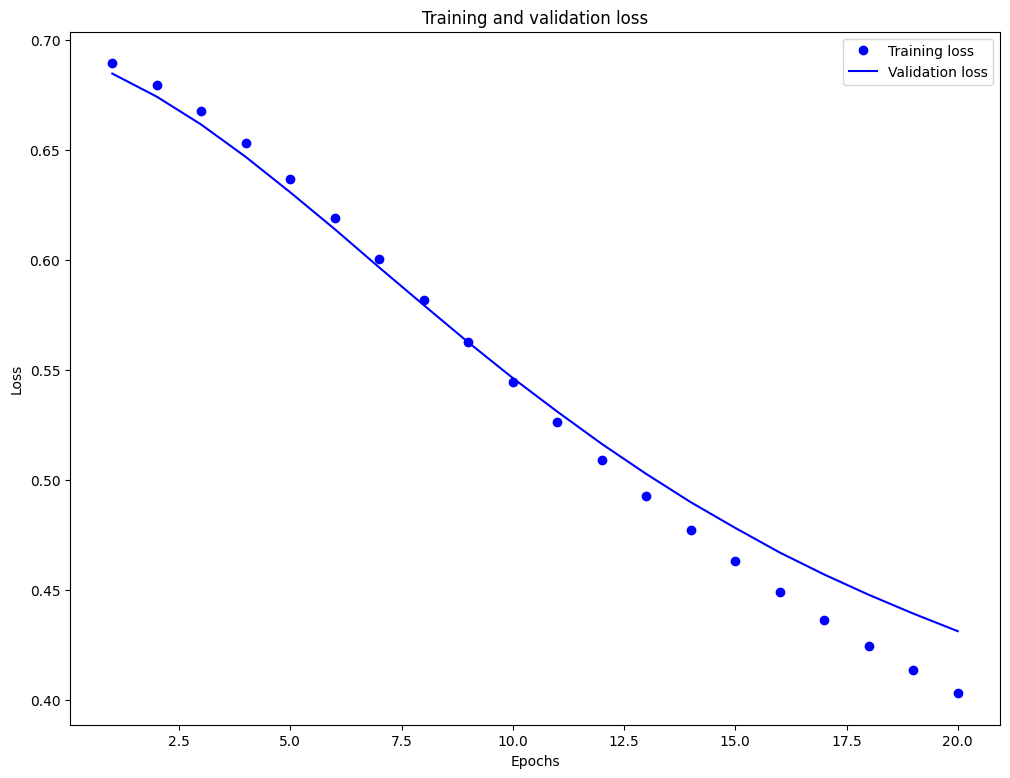

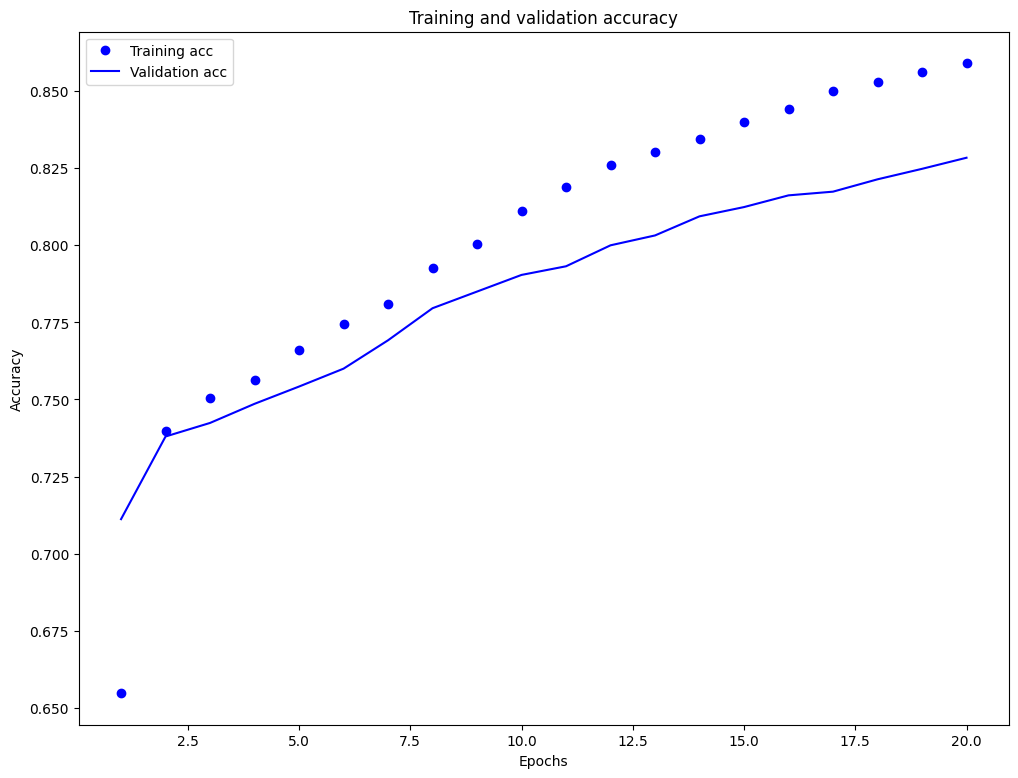

In [24]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Question 4.)

In [1]:
import tensorflow as tf
from keras import datasets, layers, models
from keras.losses import SparseCategoricalCrossentropy

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 32 is number of feature detectors (kernels)
    layers.MaxPooling2D((2, 2)), #2 is window size
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(), # convert into a column vector
    layers.Dense(64, activation='relu'), # Dense indicates when every node of one layer is connected to every other node of the next layer
    layers.Dense(10, activation='softmax')  # Changed to softmax for output probability distribution
])

In [4]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels), validation_split=0.1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 84s 41ms/step - loss: 0.4932 - accuracy: 0.8198 - val_loss: 0.3777 - val_accuracy: 0.8628
Epoch 2/30
1875/1875 [==============================] - 72s 39ms/step - loss: 0.3198 - accuracy: 0.8849 - val_loss: 0.3417 - val_accuracy: 0.8771
Epoch 3/30
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2722 - accuracy: 0.9000 - val_loss: 0.2808 - val_accuracy: 0.8993
Epoch 4/30
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2421 - accuracy: 0.9105 - val_loss: 0.2824 - val_accuracy: 0.8988
Epoch 5/30
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2165 - accuracy: 0.9193 - val_loss: 0.2672 - val_accuracy: 0.9030
Epoch 6/30
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1979 - accuracy: 0.9265 - val_loss: 0.2636 - val_accuracy: 0.9083
Epoch 7/30
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1803 - accuracy: 0.9330 - val_loss: 0.2581 - val_accura

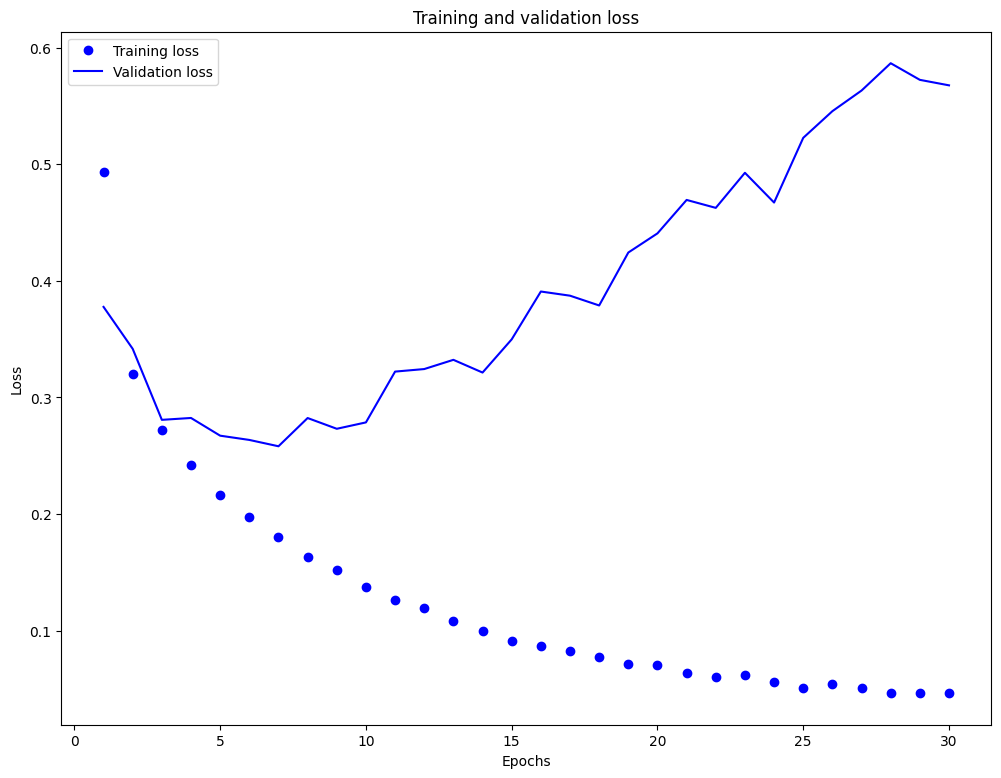

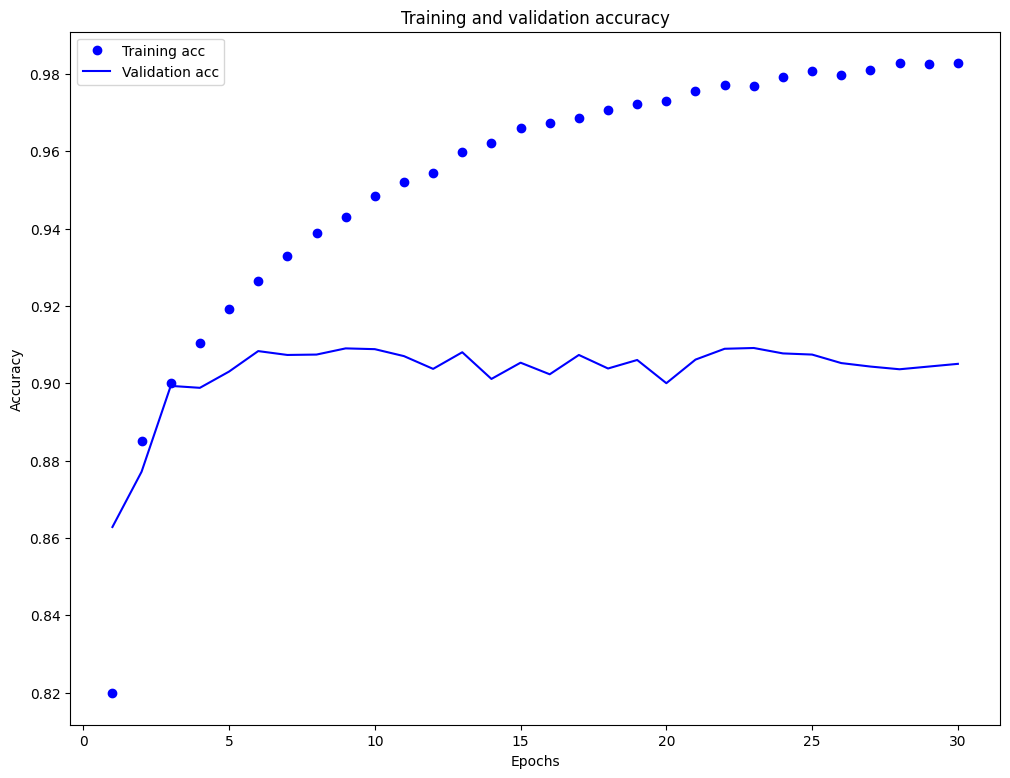

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()